In [22]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

In [23]:
df_long_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_r250mm_p10cm_lengthx10_1232173pts_09-07_160736',input_type = 'pkl').data_frame
df_short_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_1232173pts_08-10_094943',input_type = 'pkl').data_frame

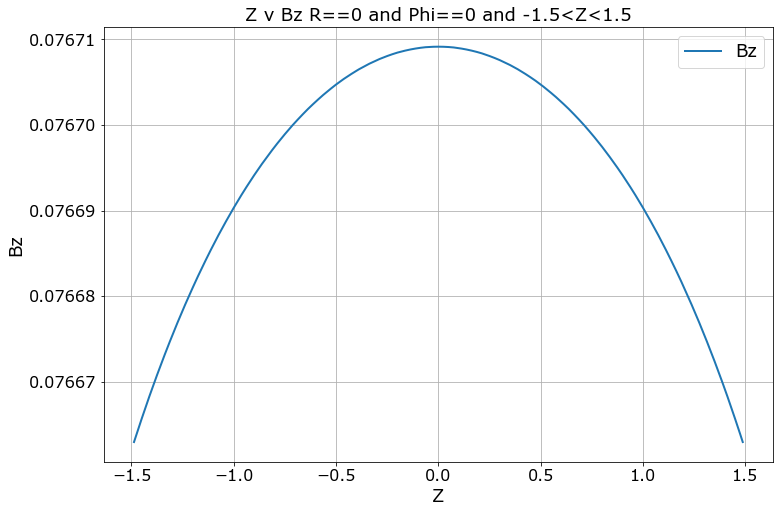

In [30]:
mu2e_plot(df_short_250mm, 'Z', 'Bz', 'R==0 and Phi==0 and -1.5<Z<1.5')


[[Model]]
    Model(sin_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2105
    # data points      = 239
    # variables        = 4
    chi-square         = 0.00000
    reduced chi-square = 0.00000
    Akaike info crit   = -6813.33242
    Bayesian info crit = -6799.42656
[[Variables]]
    amp:    -0.11673992 +/- 1.309133 (1121.41%) (init=-2e-05)
    freq:    0.01865659 +/- 0.104598 (560.65%) (init= 2)
    phase:  -1.57079632 +/- 2.20e-05 (0.00%) (init=-1.570796)
    off:    -0.04003009 +/- 1.309133 (3270.37%) (init= 0.0767)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, off)                  =  1.000
    C(freq, off)                 =  1.000
    C(amp, freq)                 =  1.000



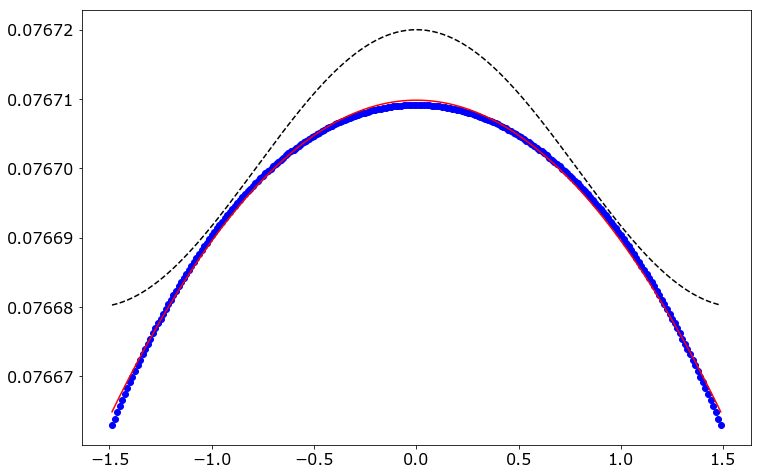

[[Model]]
    Model(cosh_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 239
    # variables        = 4
    chi-square         = 0.00000
    reduced chi-square = 0.00000
    Akaike info crit   = -8681.83531
    Bayesian info crit = -8667.92946
[[Variables]]
    amp:    -3.2927e-05 +/- 0        (0.00%) (init= 1)
    freq:    1.02342771 +/- 0        (0.00%) (init= 1)
    phase:  -9.9619e-18 +/- 0        (0.00%) (init= 0)
    off:     0.07674205 +/- 0        (0.00%) (init= 0)



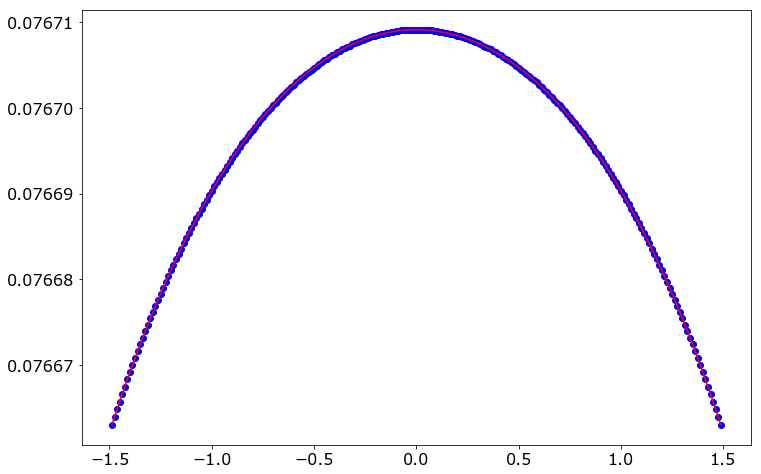

In [26]:
def sin_fit(x, amp, freq, phase, off):
    return amp * np.sin(freq*x + phase)+off
def cosh_fit(x, amp, freq, phase, off):
    return amp * np.cosh(freq*x + phase)+off

zs = df_short_250mm.query('R==0 and Phi==0 and -1.5<Z<1.5').Z
bzs = df_short_250mm.query('R==0 and Phi==0 and -1.5<Z<1.5').Bz

bzs2 = df_short_250mm.query('Y==200 and Phi==0 and -1.5<Z<1.5').Bz

smodel = Model(sin_fit)
result = smodel.fit(bzs, x=zs, amp=-2e-5, freq=2, phase=-np.pi/2, off=0.0767)
print(result.fit_report())
plt.plot(zs, bzs, 'bo')
plt.plot(zs, result.init_fit, 'k--')
plt.plot(zs, result.best_fit, 'r-')
plt.show()
cmodel = Model(cosh_fit)
result = cmodel.fit(bzs, x=zs, amp=1, freq=1, phase=0, off=0)
print(result.fit_report())
plt.figure()
plt.plot(zs, bzs, 'bo')
#plt.plot(zs, result.init_fit, 'k--')
plt.plot(zs, result.best_fit, 'r-')
plt.show()

In [16]:
df_short_250mm.R

0          0.353553
1          0.353553
2          0.353553
3          0.353553
4          0.353553
5          0.353553
6          0.353553
7          0.353553
8          0.353553
9          0.353553
10         0.353553
11         0.353553
12         0.353553
13         0.353553
14         0.353553
15         0.353553
16         0.353553
17         0.353553
18         0.353553
19         0.353553
20         0.353553
21         0.353553
22         0.353553
23         0.353553
24         0.353553
25         0.353553
26         0.353553
27         0.353553
28         0.353553
29         0.353553
             ...   
1232143    0.353553
1232144    0.353553
1232145    0.353553
1232146    0.353553
1232147    0.353553
1232148    0.353553
1232149    0.353553
1232150    0.353553
1232151    0.353553
1232152    0.353553
1232153    0.353553
1232154    0.353553
1232155    0.353553
1232156    0.353553
1232157    0.353553
1232158    0.353553
1232159    0.353553
1232160    0.353553
1232161    0.353553
